<a href="https://colab.research.google.com/github/ljw-0108/deep-learning-practice/blob/main/250514_convolution_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 인식의 꽃, 컨볼루션 신경망(CNN)

## 이미지를 인식하는 원리

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical #keras에서 nmist불러옴 수치형으로 변환하기위해 원-핫인코딩을 사용

import matplotlib.pyplot as plt
import sys
import numpy as np

(X_train, y_train) , (X_test, y_test) = mnist.load_data() #훈련,데이터셋으로 나눔 x값에는 이미지 y값에서는 0~9까지 레이블이 들어감

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


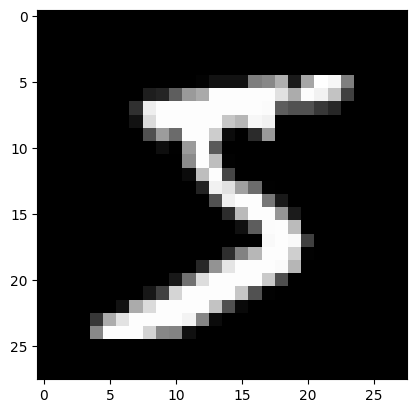

In [ ]:
plt.imshow(X_train[0], cmap='gray')#이미지 하나만 출력함
plt.show()

In [ ]:
X_train[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
# 정렬 예제
variable = 123456789

print("%20s" % variable)
print("%-20s" % variable) #-를 붙여 왼쪽부터 정렬

           123456789
123456789           


In [ ]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i) #3개씩 왼쪽으로 끊어서 정렬
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [ ]:
X_train = X_train.reshape(-1, 784) # 784 = 28*28
X_train.shape

(60000, 784)

In [ ]:
# 스케일링
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(-1, 784).astype('float64') / 255

In [ ]:
print("class : %d " % (y_train[0]))

#원-핫 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 다층 퍼셉트론으로 분류

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import os

# 모델 정의
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정
modelpath="./MNIST_MLP.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 학습
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18529, saving model to ./MNIST_MLP.keras

Epoch 2: val_loss improved from 0.18529 to 0.13331, saving model to ./MNIST_MLP.keras

Epoch 3: val_loss improved from 0.13331 to 0.11538, saving model to ./MNIST_MLP.keras

Epoch 4: val_loss improved from 0.11538 to 0.09666, saving model to ./MNIST_MLP.keras

Epoch 5: val_loss did not improve from 0.09666

Epoch 6: val_loss improved from 0.09666 to 0.08705, saving model to ./MNIST_MLP.keras

Epoch 7: val_loss improved from 0.08705 to 0.08619, saving model to ./MNIST_MLP.keras

Epoch 8: val_loss improved from 0.08619 to 0.08055, saving model to ./MNIST_MLP.keras

Epoch 9: val_loss did not improve from 0.08055

Epoch 10: val_loss did not improve from 0.08055

Epoch 11: val_loss did not improve from 0.08055

Epoch 12: val_loss did not improve from 0.08055

Epoch 13: val_loss did not improve from 0.08055

Epoch 14: val_loss did not improve from 0.08055

Epoch 15: val_loss did not improve from 0.08055

Epoc

In [ ]:
# 검증 데이터셋과 학습 데이터셋의 오차 각각 저장 후 시각화
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

In [ ]:
y_loss

[0.33559632301330566,
 0.1455313265323639,
 0.09556189179420471,
 0.07021816819906235,
 0.05211301147937775,
 0.04073454439640045,
 0.0304787028580904,
 0.024151690304279327,
 0.018521253019571304,
 0.01357958558946848,
 0.01144355908036232,
 0.008104691281914711,
 0.006570965051651001,
 0.0052389660850167274,
 0.0038543802220374346,
 0.002962856786325574,
 0.00225806818343699,
 0.0021657540928572416]

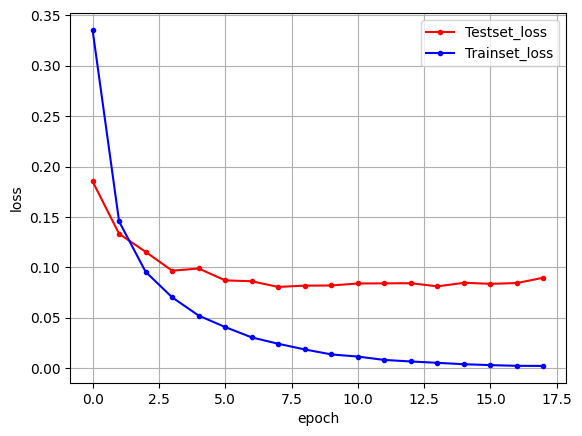

In [ ]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 컨볼루션 신경망

확인 문제1 : 출력층의 활성화 함수에 들어갈 빈칸을 채우고 이유를 설명하세요

- 이유 : 소프트맥스 함수는 모든 출력값을 0~1사이의 확률로 변환하고 총합이 1이 되게 만들어주기 때문에

확인 문제 2 : 풀링 크기를 (3,3)에서 더 크게 변경하면 모델에 어떤 영향을 미칠지 적어보세요

- 정답 :속도나 성능은 좋아질수 있지만 출력의 크기가 줄어들거나 정보손실의 증가가 나타날수있음

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 컨볼루션 신경망 정의
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
modelpath="./MNIST_CNN.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 학습
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.08165, saving model to ./MNIST_CNN.keras

Epoch 2: val_loss improved from 0.08165 to 0.06235, saving model to ./MNIST_CNN.keras

Epoch 3: val_loss improved from 0.06235 to 0.04938, saving model to ./MNIST_CNN.keras

Epoch 4: val_loss improved from 0.04938 to 0.04469, saving model to ./MNIST_CNN.keras

Epoch 5: val_loss improved from 0.04469 to 0.04292, saving model to ./MNIST_CNN.keras

Epoch 6: val_loss improved from 0.04292 to 0.04251, saving model to ./MNIST_CNN.keras

Epoch 7: val_loss did not improve from 0.04251

Epoch 8: val_loss did not improve from 0.04251

Epoch 9: val_loss did not improve from 0.04251

Epoch 10: val_loss did not improve from 0.04251

Epoch 11: val_loss did not improve from 0.04251

Epoch 12: val_loss did not improve from 0.04251

Epoch 13: val_loss improved from 0.04251 to 0.04218, saving model to ./MNIST_CNN.keras

Epoch 14: val_loss did not improve from 0.04218

Epoch 15: val_loss did not improve from 0.04218

Epoc

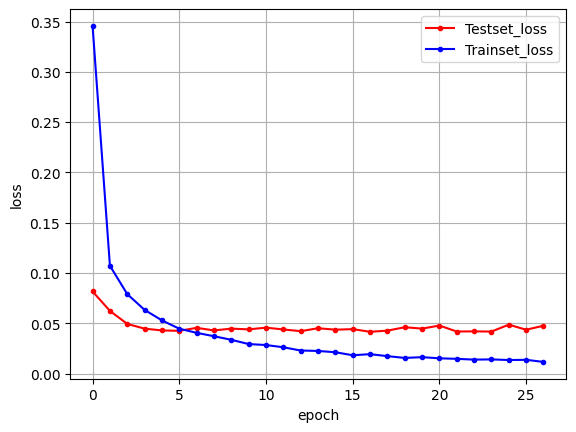

In [ ]:
# 시각화
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

확인문제 3 : 다층 퍼셉트론과 컨볼루션 신경망의 결과를 비교해보세요

컨볼루션 신경망이 더 에포크 수가 많고 훈련데이터의 기울기가 더 커졌으며 테스트데이터의 손실값이 더 적어짐